# UB Property Price Index

International data comes from the mid year 2021 property price index Numbeo created. Link: https://www.numbeo.com/property-investment/rankings.jsp

Description of index: https://www.numbeo.com/property-investment/indicators_explained.jsp

Specifically we are interested in the House Price to Income Ratio. They say this is the ratio of median house price to the net disposable family income. This is defined on Numbeo as: `1.5 * the average net salary`. Deeper in the notes this is given as the code (in Java) for the index:

``` java
public double calculateMedianHousePriceOutsideOfCentre() {
    return getBuyPricePerSquareMeterOutsideOfCentre() * 90;
}

public double calculateMedianHousePriceCityCentre() {
    return getBuyPricePerSquareMeterCityCentre() * 90;
}
public double calculateMedianHousePrice() {
    return (calculateMedianHousePriceCityCentre() + calculateMedianHousePriceOutsideOfCentre()) / 2;
}
public double calculateHousePriceToIncomeRatio() {
    return calculateMedianHousePrice() / calculateMedianFamilyDisposableIncomeYearly();
}
```

A few notes:
- Numbeo uses 90 square meters for their index. 
- Median family disposable income yearly isn't defined other than 1.5 * the average net salary. 
    - I'm guessing this means 1.5 * average yearly net salary as a proxy for annual disposable income.
    
Here we will use the mid-2021 index (including Ulaanbaatar) and then compare it to our own computed index. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from IPython.display import Image

In [2]:
plt.style.use('../mds.mplstyle')

In [3]:
df = pd.read_csv("property_price_index.csv")

In [4]:
df

,city,price_income_ratio
0,Shenzen,43.15
1,Hong Kong,45.17
2,Beijing,42.47
3,Shanghai,33.36
4,Guangzhou,30.52
5,Paris,20.47
6,Singapore,17.63
7,Munich,15.31
8,London,13.37
9,Tokyo,13.77


In [5]:
df = df[:14]

In [6]:
df = df.sort_values(by='price_income_ratio', ascending=True).reset_index(drop=True)

## Mid-2021 Chart Using Numbeo Data

In [7]:
plt.rcParams.update({'font.size': 18})

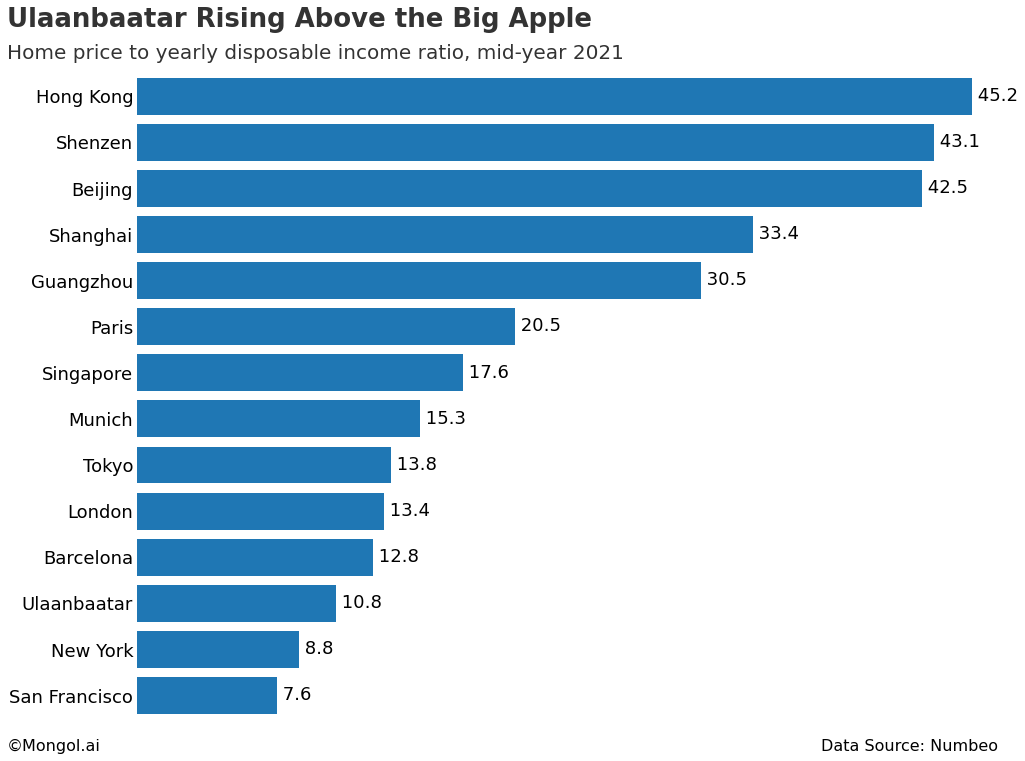

In [8]:
fig, ax = plt.subplots(figsize=(14,12))

# Plot data and label axes
ax.barh(df['city'], df['price_income_ratio'], color='tab:blue')

# Title and subtitle
ax.text(x = -7, y = 14.5, s = 'Ulaanbaatar Rising Above the Big Apple', fontsize=26, weight='bold', alpha=.8)
ax.text(x = -7, y = 13.8, s = 'Home price to yearly disposable income ratio, mid-year 2021', fontsize=20, alpha=.8)

# Remove X and Y axes
ax.spines.left.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.tick_params(axis="x", labelbottom=False)


for index, value in enumerate(df['price_income_ratio']):
    ax.text(value, index-.1, " " + str(round(value, 1)), ha = 'left')
    
# Set bottom banner
ax.text(x = -7, y = -1.2, s = '©Mongol.ai', fontsize = 16, )
ax.text(x = 37, y = -1.2, s = 'Data Source: Numbeo', fontsize = 16)

plt.savefig('homeprice_income_ratio_numbeo.png', dpi = 300, bbox_inches="tight")

## UB Calculation

To make our own home price index calculation we need a few things:

- Median house price
- Size of house (90 square meters per Numbeo)
- net disposable family income (yearly)
    - Numbeo uses 1.5 * average net salary
    
For **median house price**, we can use data from Doljoo from Tenkhleg Zuuch, a real estate property and project management company (thank @Shoot91 on Twitter). [Link to the image](https://twitter.com/Shoot91/status/1441313879271772163?s=20). For the 2nd quarter of 2021 in UB this is 2,467,047 MNT per square meter (picture below). 

For net disposable family income (yearly), we have to make a choice. It's unclear whether Numbeo is using *average* salary or *median* salary. If average salary, we have a good number for Ulaanbaatar. If median salary, we only have a national number. 

As we have an average house price (which is probably higher than the median), we can use the average salary for Ulaanbaatar (which is probably significantly higher than the median). Here is the [link](http://www.1212.mn/tables.aspx?tbl_id=DT_NSO_0400_021V1&SOUM_select_all=0&SOUMSingleSelect=_511_0&Gender_select_all=0&GenderSingleSelect=_1&YearQ_select_all=0&YearQSingleSelect=_202102&YearY_select_all=0&YearYSingleSelect=&viewtype=columnchart) to the average UB salary per month from 1212.mn.

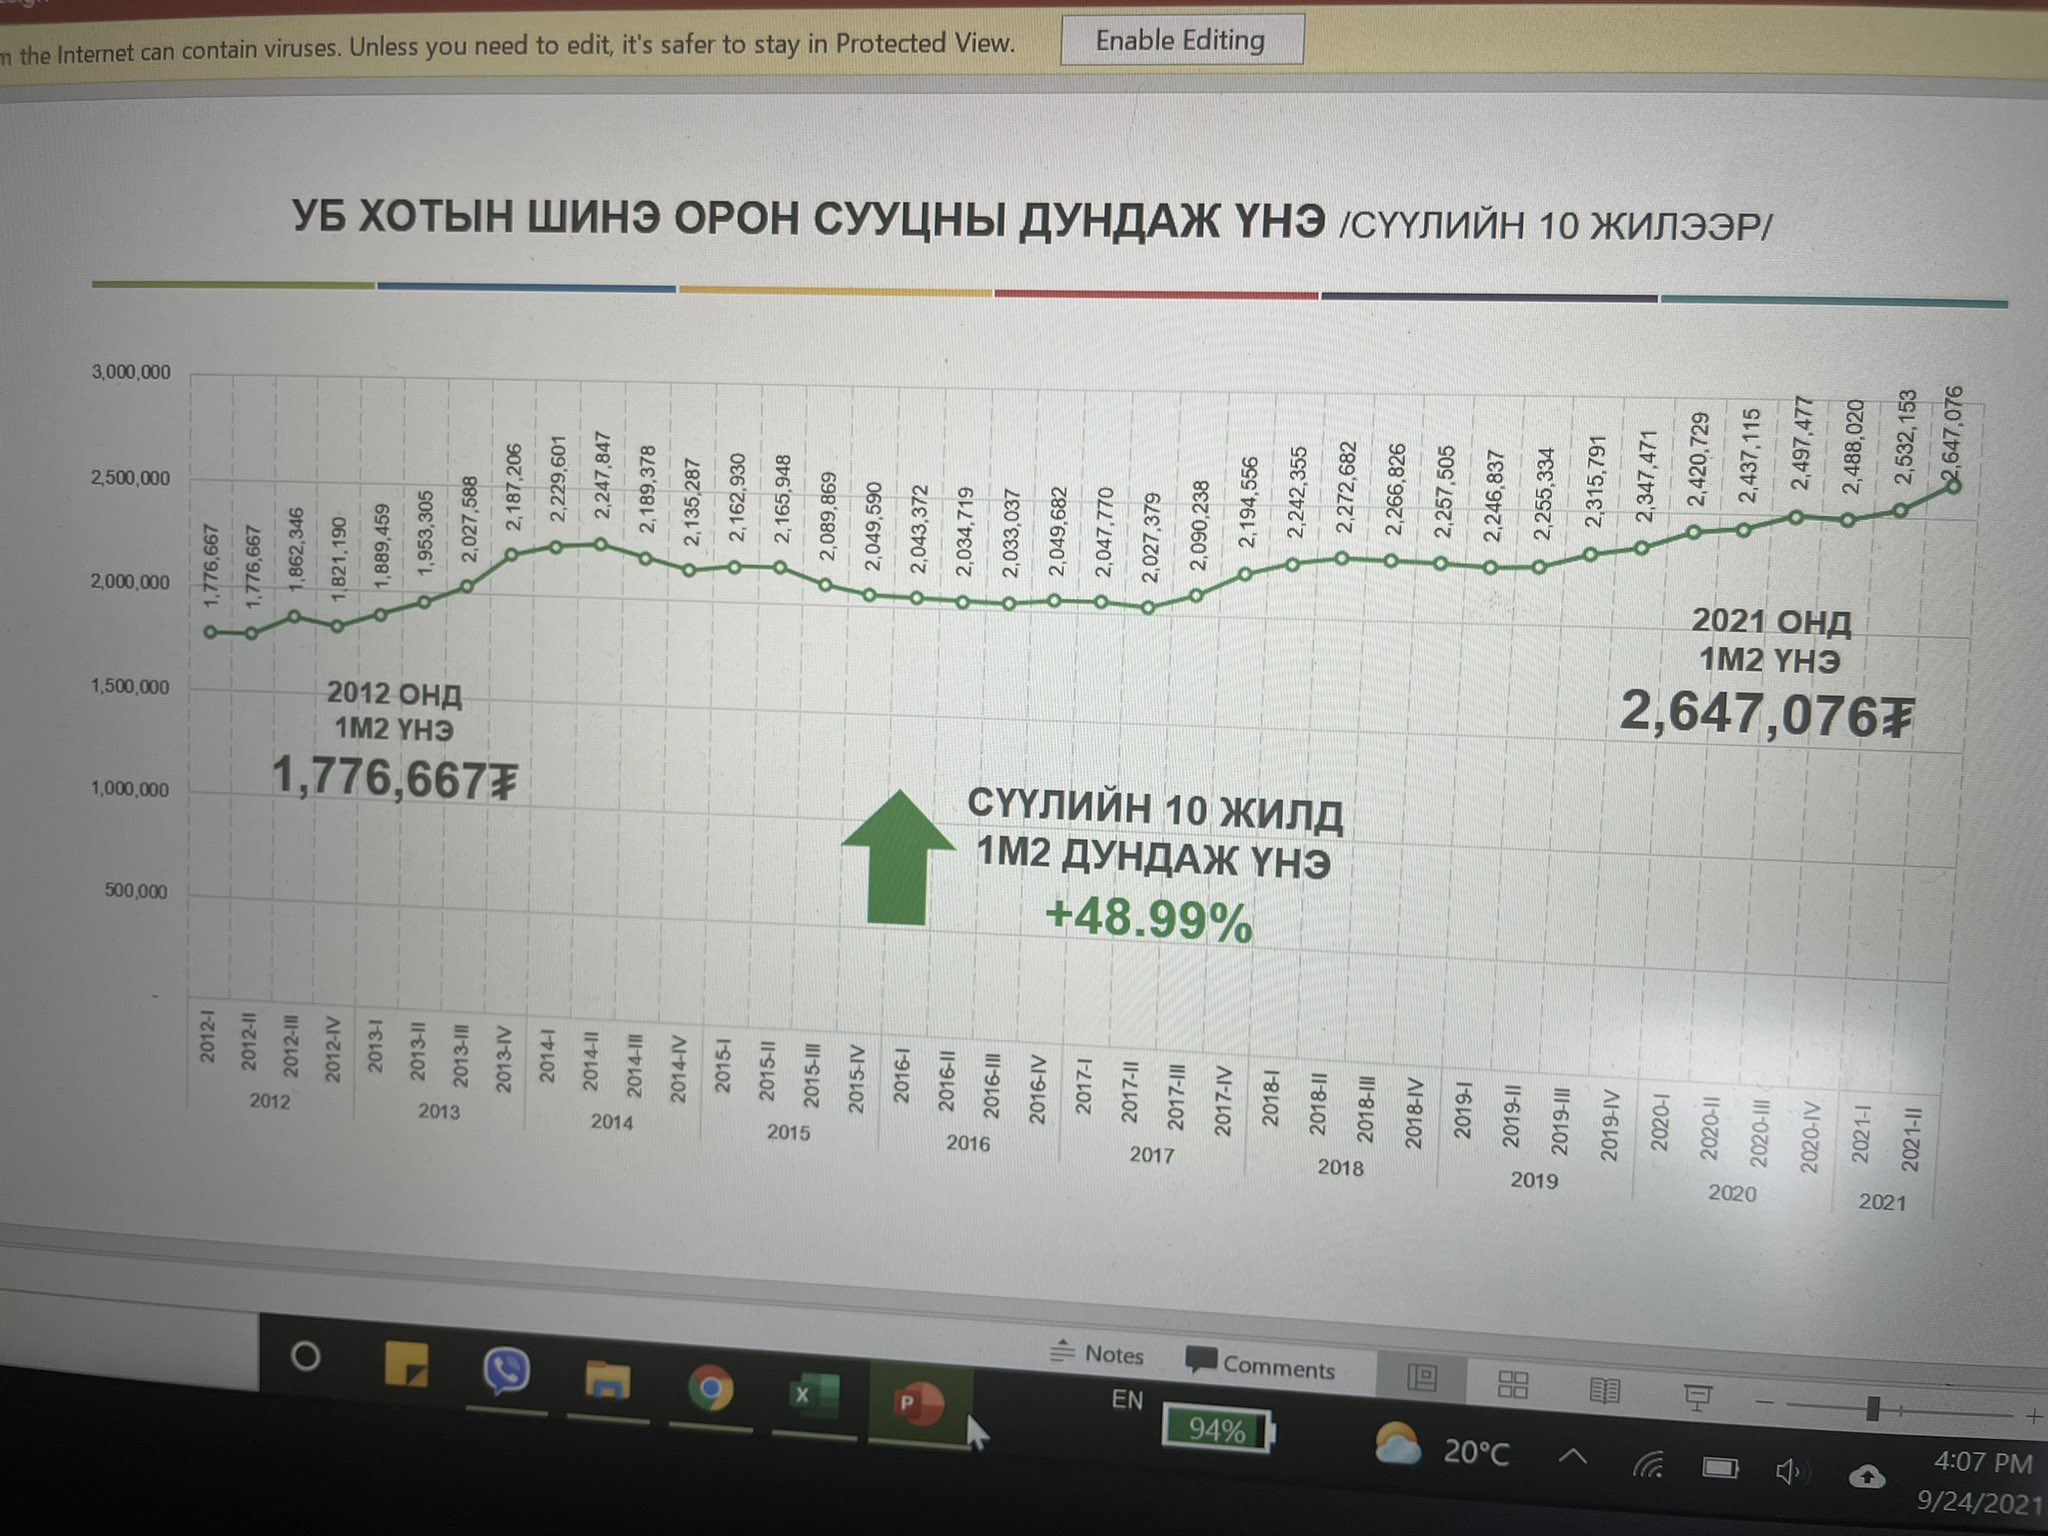

In [9]:
Image(filename="../../images/apartment-price-income-ratio/average_ub_homeprice_quarterly.jpeg", width=500)

In [10]:
price_sqrmtr = 2_647_076
avg_sqrmtr = 90

In [11]:
avg_apartment_price = price_sqrmtr * avg_sqrmtr

In [12]:
ub_salary_monthly = 1_433_100
tax_rate = 0.235

In [13]:
net_disposable_income = ub_salary_monthly * (1-tax_rate) * 12 * 1.5

In [14]:
net_disposable_income

19733787.0

In [15]:
avg_apartment_price / net_disposable_income

12.0725352918829

This is a very similar number to what Numbeo had. In context, this means that average apartment is 11.25 times the average salary for Ulaanbaatar. 

## Using Median

Let's use a few different numbers so we can look at UB by itself.

- Apartment size = 62 square meters
- Salary = national median
- Tax rate = 0.235

In [16]:
price_sqrmtr = 2_647_076
median_sqrmtr = 62

In [17]:
avg_apartment_price = price_sqrmtr * median_sqrmtr

In [18]:
national_median_salary = 993_600
tax_rate = 0.235

In [19]:
net_disposable_income = national_median_salary * (1-tax_rate) * 12 * 1.5

In [20]:
net_disposable_income

13681872.0

In [21]:
avg_apartment_price / net_disposable_income

11.995340403710838

## Make a Mongolia specific index

### Average Apartment Prices

In [22]:
ub_prices = pd.read_csv("ub_apartment_prices.csv", thousands=",")

In [23]:
ub_prices.head()

,quarter,average_price_sqrmtr
0,2012-I,1776667.0
1,2012-II,1776667.0
2,2012-III,1862346.0
3,2012-IV,1821190.0
4,2013-I,1889459.0


In [24]:
ub_prices['quarter'] = ub_prices['quarter'].str.replace("III","09-30").str.replace("II","06-30").str.replace("IV","12-31").str.replace("I","03-31")

In [25]:
ub_prices.head()

,quarter,average_price_sqrmtr
0,2012-03-31,1776667.0
1,2012-06-30,1776667.0
2,2012-09-30,1862346.0
3,2012-12-31,1821190.0
4,2013-03-31,1889459.0


### Average Salary

In [26]:
salary = pd.read_csv("DT_NSO_0400_021V1_-_2021-10-06_-_www.1212.mn.csv", thousands=",")

In [27]:
salary.head()

,Aimag,Sex,2000-IV,2001-I,2001-II,2001-III,2001-IV,2002-I,2002-II,2002-III,...,2019-I,2019-II,2019-III,2019-IV,2020-I,2020-II,2020-III,2020-IV,2021-I,2021-II
0,Total,Total,62.3,60.9,67.7,64.9,67.4,68.0,70.1,71.4,...,1157.9,1161.2,1166.4,1242.7,1259.7,1261.3,1269.1,1328.1,1314.9,1330.4
1,Ulaanbaatar,Total,74.4,73.4,81.5,78.4,76.7,77.0,81.6,83.4,...,1279.5,1282.6,1284.3,1365.9,1359.3,1371.1,1367.4,1423.2,1415.8,1433.1


In [28]:
salary = salary.melt(id_vars=['Aimag','Sex'], var_name='quarter', value_name='salary')

In [29]:
salaries = salary[salary['Aimag'] == 'Total'].reset_index(drop=True)

In [30]:
ub_salaries = salary[salary['Aimag'] == 'Ulaanbaatar'].reset_index(drop=True).rename(columns={'salary':'ulaanbaatar_salary'})

In [31]:
salary = salaries.merge(ub_salaries, on='quarter', how='outer').drop(columns=['Aimag_x','Sex_x','Aimag_y','Sex_y'])

In [32]:
salary['quarter'] = salary['quarter'].str.replace("III","09-30").str.replace("II","06-30").str.replace("IV","12-31").str.replace("I","03-31")

In [33]:
salary['salary'] = salary['salary'] * 1000

In [34]:
salary['ulaanbaatar_salary'] = salary['ulaanbaatar_salary'] * 1000

In [35]:
salary.head()

,quarter,salary,ulaanbaatar_salary
0,2000-12-31,62300.0,74400.0
1,2001-03-31,60900.0,73400.0
2,2001-06-30,67700.0,81500.0
3,2001-09-30,64900.0,78400.0
4,2001-12-31,67400.0,76700.0


### Median Wages

In [36]:
median_wage = pd.read_csv("DT_NSO_0400_069V2_-_2021-10-05_-_www.1212.mn.csv")

In [37]:
median_wage.head()

,Median wage,2014-I,2014-II,2014-III,2014-IV,2015-I,2015-II,2015-III,2015-IV,2016-I,...,2019-I,2019-II,2019-III,2019-IV,2020-I,2020-II,2020-III,2020-IV,2021-I,2021-II
0,Median wage,558,594.3,589.5,665.4,650,664,636.8,680.7,663.7,...,827.8,842.9,843,905,917.2,943.5,942,995.9,945.7,993.6


In [38]:
median_wage = median_wage.melt(id_vars=['Median wage'], var_name='quarter', value_name='median_wage')

In [39]:
median_wage.head()

,Median wage,quarter,median_wage
0,Median wage,2014-I,558.0
1,Median wage,2014-II,594.3
2,Median wage,2014-III,589.5
3,Median wage,2014-IV,665.4
4,Median wage,2015-I,650.0


In [40]:
median_wage = median_wage.drop(columns=['Median wage'])

In [41]:
median_wage['quarter'] = median_wage['quarter'].str.replace("III","09-30").str.replace("II","06-30").str.replace("IV","12-31").str.replace("I","03-31")

In [42]:
median_wage['median_wage'] = median_wage['median_wage'] * 1000

### Merge Data

In [43]:
ratio_df = ub_prices.merge(salary, on='quarter', how='left')

In [44]:
ratio_df = ratio_df.merge(median_wage, on='quarter', how='left')

In [45]:
ratio_df.sample(5)

,quarter,average_price_sqrmtr,salary,ulaanbaatar_salary,median_wage
12,2015-03-31,2162930.0,851400.0,925300.0,650000.0
11,2014-12-31,2135287.0,844000.0,921500.0,665400.0
27,2018-12-31,2257505.0,1120300.0,1255700.0,806600.0
1,2012-06-30,1776667.0,571100.0,618100.0,NaN
3,2012-12-31,1821190.0,598500.0,652200.0,NaN


In [46]:
missing_2013 = (ratio_df['salary'][8] + ratio_df['salary'][4]) / 2
missing_2016 = (ratio_df['salary'][17] + ratio_df['salary'][19]) / 2

In [47]:
missing_ub_2013 = (ratio_df['ulaanbaatar_salary'][8] + ratio_df['ulaanbaatar_salary'][4]) / 2
missing_ub_2016 = (ratio_df['ulaanbaatar_salary'][17] + ratio_df['ulaanbaatar_salary'][19]) / 2

In [48]:
ratio_df.loc[5:7, 'salary'] = missing_2013
ratio_df.loc[18:18, 'salary'] = missing_2016

In [49]:
ratio_df.loc[5:7, 'ulaanbaatar_salary'] = missing_ub_2013
ratio_df.loc[18:18, 'ulaanbaatar_salary'] = missing_ub_2016

In [50]:
tax_rate = 0.235

In [51]:
ratio_df

,quarter,average_price_sqrmtr,salary,ulaanbaatar_salary,median_wage
0,2012-03-31,1776667.0,495100.0,556800.0,NaN
1,2012-06-30,1776667.0,571100.0,618100.0,NaN
2,2012-09-30,1862346.0,565500.0,615800.0,NaN
3,2012-12-31,1821190.0,598500.0,652200.0,NaN
4,2013-03-31,1889459.0,692300.0,731600.0,NaN
5,2013-06-30,1953305.0,727600.0,782950.0,NaN
6,2013-09-30,2027588.0,727600.0,782950.0,NaN
7,2013-12-31,2187206.0,727600.0,782950.0,NaN
8,2014-03-31,2229601.0,762900.0,834300.0,558000.0
9,2014-06-30,2247847.0,786700.0,849200.0,594300.0


### Create net_yearly_salary

In [52]:
ratio_df['net_yearly_salary'] = ratio_df['salary'] * (1-tax_rate) * 12 * 1.5

Tenkhleg Zuuch currently uses 62 square meters as "average" for UB. We will use 60 because it's a bit more even.

In [53]:
ratio_df['avg_apartment_price'] = ratio_df['average_price_sqrmtr'] * 62

In [54]:
ratio_df.tail()

,quarter,average_price_sqrmtr,salary,ulaanbaatar_salary,median_wage,net_yearly_salary,avg_apartment_price
33,2020-06-30,2437115.0,1261300.0,1371100.0,943500.0,17368101.0,151101130.0
34,2020-09-30,2497477.0,1269100.0,1367400.0,942000.0,17475507.0,154843574.0
35,2020-12-31,2488020.0,1328100.0,1423200.0,995900.0,18287937.0,154257240.0
36,2021-03-31,2532153.0,1314900.0,1415800.0,945700.0,18106173.0,156993486.0
37,2021-06-30,2647076.0,1330400.0,1433100.0,993600.0,18319608.0,164118712.0


In [55]:
ratio_df['price_income_ratio'] = ratio_df['avg_apartment_price'] / ratio_df['net_yearly_salary']

In [56]:
ratio_df.head()

,quarter,average_price_sqrmtr,salary,ulaanbaatar_salary,median_wage,net_yearly_salary,avg_apartment_price,price_income_ratio
0,2012-03-31,1776667.0,495100.0,556800.0,NaN,6817527.0,110153354.0,16.157377
1,2012-06-30,1776667.0,571100.0,618100.0,NaN,7864047.0,110153354.0,14.007210
2,2012-09-30,1862346.0,565500.0,615800.0,NaN,7786935.0,115465452.0,14.828100
3,2012-12-31,1821190.0,598500.0,652200.0,NaN,8241345.0,112913780.0,13.700892
4,2013-03-31,1889459.0,692300.0,731600.0,NaN,9532971.0,117146458.0,12.288557


### Create net_yearly_median_wages

In [57]:
ratio_df['net_yearly_median_wages'] = ratio_df['median_wage'] * (1-tax_rate) * 12 * 1.5

In [58]:
ratio_df['price_median_wage_ratio'] = ratio_df['avg_apartment_price'] / ratio_df['net_yearly_median_wages']

In [59]:
ratio_df.tail()

,quarter,average_price_sqrmtr,salary,ulaanbaatar_salary,median_wage,net_yearly_salary,avg_apartment_price,price_income_ratio,net_yearly_median_wages,price_median_wage_ratio
33,2020-06-30,2437115.0,1261300.0,1371100.0,943500.0,17368101.0,151101130.0,8.699922,12991995.0,11.630325
34,2020-09-30,2497477.0,1269100.0,1367400.0,942000.0,17475507.0,154843574.0,8.860606,12971340.0,11.937361
35,2020-12-31,2488020.0,1328100.0,1423200.0,995900.0,18287937.0,154257240.0,8.434918,13713543.0,11.248533
36,2021-03-31,2532153.0,1314900.0,1415800.0,945700.0,18106173.0,156993486.0,8.670716,13022289.0,12.055752
37,2021-06-30,2647076.0,1330400.0,1433100.0,993600.0,18319608.0,164118712.0,8.958637,13681872.0,11.995340


## Visualize Indices

In [60]:
ratio_df['quarter'] = pd.to_datetime(ratio_df['quarter'])

In [61]:
ratio_df.sample(10)

,quarter,average_price_sqrmtr,salary,ulaanbaatar_salary,median_wage,net_yearly_salary,avg_apartment_price,price_income_ratio,net_yearly_median_wages,price_median_wage_ratio
10,2014-09-30,2189378.0,792800.0,872700.0,589500.0,10916856.0,135741436.0,12.434114,8117415.0,16.722249
4,2013-03-31,1889459.0,692300.0,731600.0,NaN,9532971.0,117146458.0,12.288557,NaN,NaN
14,2015-09-30,2089869.0,836900.0,915200.0,636800.0,11524113.0,129571878.0,11.243545,8768736.0,14.776574
31,2019-12-31,2347471.0,1242700.0,1365900.0,905000.0,17111979.0,145543202.0,8.505340,12461850.0,11.679101
22,2017-09-30,2090238.0,955900.0,1075100.0,690900.0,13162743.0,129594756.0,9.845574,9513693.0,13.621919
28,2019-03-31,2246837.0,1157900.0,1279500.0,827800.0,15944283.0,139303894.0,8.736918,11398806.0,12.220920
12,2015-03-31,2162930.0,851400.0,925300.0,650000.0,11723778.0,134101660.0,11.438434,8950500.0,14.982589
32,2020-03-31,2420729.0,1259700.0,1359300.0,917200.0,17346069.0,150085198.0,8.652404,12629844.0,11.883377
17,2016-06-30,2034719.0,888000.0,975000.0,681200.0,12227760.0,126152578.0,10.316900,9380124.0,13.448924
18,2016-09-30,2033037.0,915450.0,1014150.0,655200.0,12605746.5,126048294.0,9.999272,9022104.0,13.971053


### Average vs Median Wage

In [62]:
ratio_df.tail()

,quarter,average_price_sqrmtr,salary,ulaanbaatar_salary,median_wage,net_yearly_salary,avg_apartment_price,price_income_ratio,net_yearly_median_wages,price_median_wage_ratio
33,2020-06-30,2437115.0,1261300.0,1371100.0,943500.0,17368101.0,151101130.0,8.699922,12991995.0,11.630325
34,2020-09-30,2497477.0,1269100.0,1367400.0,942000.0,17475507.0,154843574.0,8.860606,12971340.0,11.937361
35,2020-12-31,2488020.0,1328100.0,1423200.0,995900.0,18287937.0,154257240.0,8.434918,13713543.0,11.248533
36,2021-03-31,2532153.0,1314900.0,1415800.0,945700.0,18106173.0,156993486.0,8.670716,13022289.0,12.055752
37,2021-06-30,2647076.0,1330400.0,1433100.0,993600.0,18319608.0,164118712.0,8.958637,13681872.0,11.995340


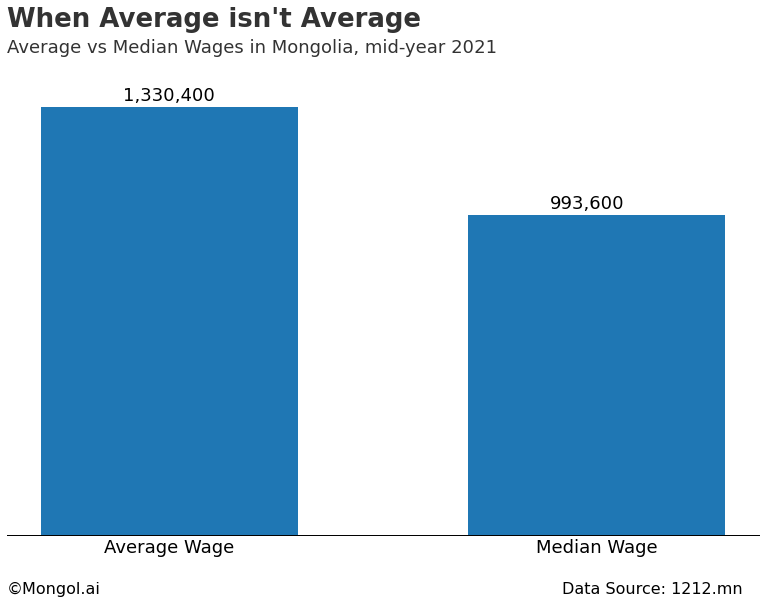

In [63]:
fig, ax = plt.subplots()

# Plot data and label axes
labels = ['Average Wage', 'Median Wage']
values = ratio_df[['salary','median_wage']].iloc[-1].values / 1000
ax.bar(labels, values, color="tab:blue", width=.6)
ax.set_ylim(top=1450, bottom=0)


# Set Spines
ax.spines.left.set_visible(False)
ax.tick_params(axis="y", labelleft=False)

# Add annotations
for index, value in enumerate(values):
    ax.text(index-.11, value + 20, format(round(value * 1000), ',d'), ha = 'left')

# Title and subtitle
ax.text(x = -.38, y = 1580, s = "When Average isn't Average", fontsize=26, weight='bold', alpha=.8)
ax.text(x = -.38, y = 1500, s = 'Average vs Median Wages in Mongolia, mid-year 2021', fontsize=18, alpha=.8)

# Set bottom banner
ax.text(x = -.38, y = -180, s = '©Mongol.ai', fontsize = 16, )
ax.text(x = .92, y = -180, s = 'Data Source: 1212.mn', fontsize = 16)


plt.savefig('salary_median_wages.png', dpi = 300, bbox_inches="tight")

### Average and Median Income Index

In [64]:
ratio_df.head()

,quarter,average_price_sqrmtr,salary,ulaanbaatar_salary,median_wage,net_yearly_salary,avg_apartment_price,price_income_ratio,net_yearly_median_wages,price_median_wage_ratio
0,2012-03-31,1776667.0,495100.0,556800.0,NaN,6817527.0,110153354.0,16.157377,NaN,NaN
1,2012-06-30,1776667.0,571100.0,618100.0,NaN,7864047.0,110153354.0,14.007210,NaN,NaN
2,2012-09-30,1862346.0,565500.0,615800.0,NaN,7786935.0,115465452.0,14.828100,NaN,NaN
3,2012-12-31,1821190.0,598500.0,652200.0,NaN,8241345.0,112913780.0,13.700892,NaN,NaN
4,2013-03-31,1889459.0,692300.0,731600.0,NaN,9532971.0,117146458.0,12.288557,NaN,NaN


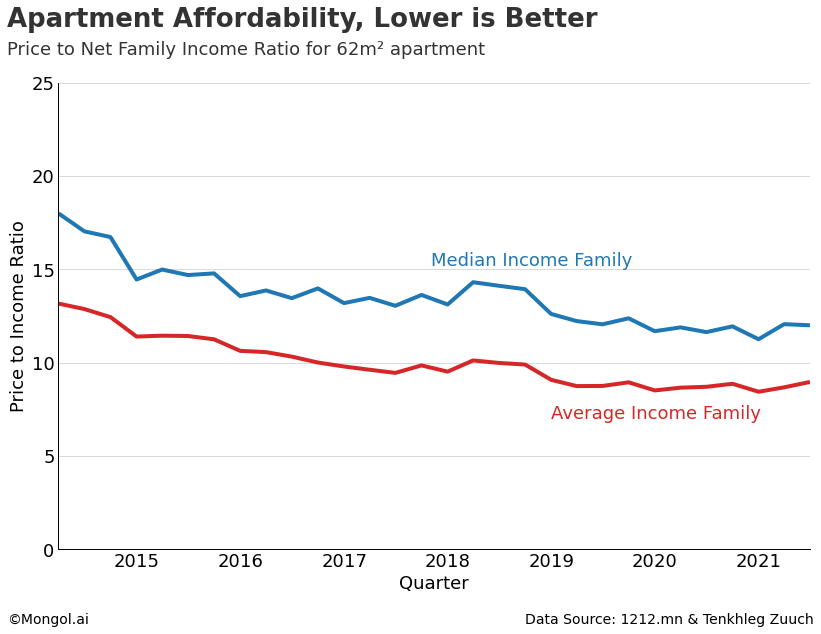

In [65]:
fig, ax = plt.subplots()

# Plot data and label axes
ax.plot(ratio_df['quarter'], ratio_df['price_income_ratio'], color='tab:red')
ax.plot(ratio_df['quarter'], ratio_df['price_median_wage_ratio'], color='tab:blue')
ax.set_xlabel('Quarter')
ax.set_ylabel("Price to Income Ratio")
ax.set_ylim(top=25, bottom=0)
ax.set_xlim(left=datetime.date(2014, 3, 30), right=datetime.date(2021, 6, 30))

# Set Spines
ax.spines.bottom.set_position(('data', 0))
ax.grid(axis='y', alpha=.7)

# Add annotations
ax.text(x = datetime.date(2019, 1, 1), y=7, s='Average Income Family', fontsize = 18, color='tab:red')
ax.text(x = datetime.date(2017, 11, 1), y=15.2, s='Median Income Family', fontsize = 18, color='tab:blue')

# Title and subtitle
ax.text(x = datetime.date(2013, 10, 1), y = 28, s = 'Apartment Affordability, Lower is Better', fontsize=26, weight='bold', alpha=.8)
ax.text(x = datetime.date(2013, 10, 1), y = 26.5, s = 'Price to Net Family Income Ratio for 62m² apartment', fontsize=18, alpha=.8)

# Set bottom banner
ax.text(x = datetime.date(2013, 10, 1), y = -4, s = '©Mongol.ai', fontsize = 14 )
ax.text(x = datetime.date(2018, 10, 1), y = -4, s = 'Data Source: 1212.mn & Tenkhleg Zuuch', fontsize = 14)


plt.savefig('price_income_ratio.png', dpi = 300, bbox_inches="tight")

In [66]:
ratio_df

,quarter,average_price_sqrmtr,salary,ulaanbaatar_salary,median_wage,net_yearly_salary,avg_apartment_price,price_income_ratio,net_yearly_median_wages,price_median_wage_ratio
0,2012-03-31,1776667.0,495100.0,556800.0,NaN,6817527.0,110153354.0,16.157377,NaN,NaN
1,2012-06-30,1776667.0,571100.0,618100.0,NaN,7864047.0,110153354.0,14.007210,NaN,NaN
2,2012-09-30,1862346.0,565500.0,615800.0,NaN,7786935.0,115465452.0,14.828100,NaN,NaN
3,2012-12-31,1821190.0,598500.0,652200.0,NaN,8241345.0,112913780.0,13.700892,NaN,NaN
4,2013-03-31,1889459.0,692300.0,731600.0,NaN,9532971.0,117146458.0,12.288557,NaN,NaN
5,2013-06-30,1953305.0,727600.0,782950.0,NaN,10019052.0,121104910.0,12.087462,NaN,NaN
6,2013-09-30,2027588.0,727600.0,782950.0,NaN,10019052.0,125710456.0,12.547141,NaN,NaN
7,2013-12-31,2187206.0,727600.0,782950.0,NaN,10019052.0,135606772.0,13.534891,NaN,NaN
8,2014-03-31,2229601.0,762900.0,834300.0,558000.0,10505133.0,138235262.0,13.158830,7683660.0,17.990809
9,2014-06-30,2247847.0,786700.0,849200.0,594300.0,10832859.0,139366514.0,12.865165,8183511.0,17.030162
